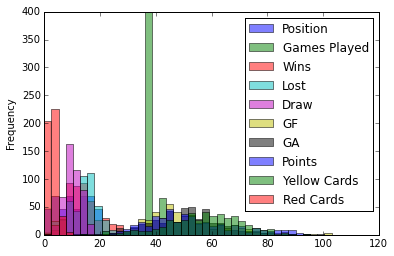

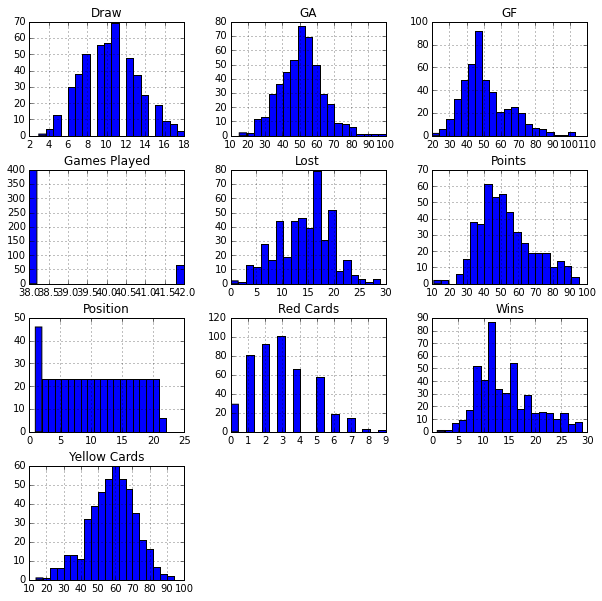

In [1]:

# coding: utf-8

# In[1]:

get_ipython().magic(u'matplotlib inline')
import matplotlib.pyplot as plt
import pandas as pd
from pandas import Series, DataFrame 
import numpy 
from bs4 import BeautifulSoup
import urllib2


# In[2]:

list1 =[]
year = []; Pos = []; Team =[]; Pld = []; W =[]; D = []; L =[]; GF = []; GA =[]; Pts =[]; YC =[]; RC =[]


# In[3]:


def link_generator():
    n = -1
    m = -1

    first = [str(n + i) for i in range(1992,2001)]
    second = [str(n + i) for i in range(93, 101)]
    third = [str(n + i) for i in range(2000,2016)]
    fourth = [m + i for i in range(1,17)]
    # To fill the 0's
    fourth =["%02d" % m for m in fourth]

    for i in range(1,8):
        s = first[i] +"-" + second[i]
        list1.append("http://www.bdfutbol.com/es/t/teng"+ s +".html")
    for i in range(len(third)):
        r = third[i]+ "-" + fourth[i]
        list1.append("http://www.bdfutbol.com/es/t/teng"+ r +".html")


# In[4]:

link_generator()


# In[6]:

def cell_parsing(cells_table):
    Pos.append(cells_table[1].text.encode('utf-8'))
    Team.append(cells_table[3].text.encode('utf-8')) #td[3].text Team
    Pld.append(cells_table[5].text.encode('utf-8')) #td[5].text  PJ
    W.append(cells_table[6].text.encode('utf-8')) #td[6].text  PG
    D.append(cells_table[7].text.encode('utf-8')) #td[7].text  PE
    L.append(cells_table[8].text.encode('utf-8')) #td[8].text  PP
    GF.append(cells_table[9].text.encode('utf-8')) #td[9].text  GF
    GA.append(cells_table[10].text.encode('utf-8')) #td[10].text  GC
    Pts.append(cells_table[4].string.encode('utf-8')) #td[4].text Points
    YC.append(cells_table[11].text.encode('utf-8'))
    RC.append(cells_table[12].text.encode('utf-8')) #td[12].text TR


# In[7]:

def ultimate_parser(link):
#This function will parse stadings for the EPL from a list of websites
    for item in link:
        page = urllib2.urlopen(item)
        soup = BeautifulSoup(page, 'html.parser')
        tables = soup.find('table', {'class':'taulabdf classif sortable'}) 
        tr = tables.findAll('tr')

        for i in range(len(tr)):
            td = tr[i].findAll("td")

            if len(td)==13:
                cell_parsing(td)


# In[8]:

ultimate_parser(list1)


# In[12]:

d = {"Position": Pos,
     "Teams": Team,
     "Games Played":Pld,
     "Wins":W,
     "Lost":L,
     "Draw":D,
     "GF":GF,
     "GA":GA,
     "Points":Pts,
     "Yellow Cards":YC,
     "Red Cards":RC
     }


# In[13]:

indeces = ["Position", "Teams", "Games Played", "Wins", "Lost", "Draw", "GF", "GA", "Points", "Yellow Cards", "Red Cards"]
frame = DataFrame(d, columns= indeces)
pd.set_option('display.max_rows', len(frame))


# In[15]:

#frame['Teams'] = frame['Teams'].astype('category')

frame[frame['Points']=='19*']
frame[frame['Points']=='39*']

## TO avoid chaning!!!!
#dfc.loc[0,'A']
frame.loc[365,'Points'] = 19
frame.loc[104,'Points'] = 39


# In[50]:

# Here we're converting the point column to integer type

def cast_type(types):
    'Function that converts the default types in the data frame so we can use them'
    for items in types:
        if items != "Teams":
            frame[items] = frame[items].astype('int')
        else:
            frame[items] = frame[items].astype('category')
     


# In[44]:

cast_type(indeces)


# In[49]:

frame.dtypes


# In[51]:

plt.figure()
frame.plot(kind = 'hist', alpha = 0.5, bins =40)


# In[79]:

# Let's take a look at the distribution per variable
fig = frame.hist(figsize= (18,10), bins = 20)


# In[74]:

## Let's get the means of the all the variables
frame.mean()


# In[102]:

# Let's create a bar plot to analyze the categorical variable- teams

frame.Teams.value_counts().plot(kind= 'barh', figsize= (10,10))


# In[124]:

# Let's take a count
counts = frame.Teams.value_counts()

# These teams have never been demoted!
never_demoted = counts[counts == 23]
number_nd = len(counts[counts == 23])
never_demoted


# In[127]:

# Let's do a density plot

frame.Wins.plot(kind = 'kde')



In [11]:
for x,y in zip(frame['Games Played'], frame.Points):
    max_points = x *3
    pts = y / float(max_points)
    print pts*100

66.6666666667
58.7301587302
57.1428571429
56.3492063492
50.0
46.8253968254
46.8253968254
46.8253968254
45.2380952381
44.4444444444
44.4444444444
42.8571428571
42.0634920635
41.2698412698
41.2698412698
41.2698412698
40.4761904762
39.6825396825
38.8888888889
38.8888888889
34.9206349206
31.746031746
73.0158730159
66.6666666667
61.1111111111
56.3492063492
55.5555555556
51.5873015873
50.7936507937
47.619047619
47.619047619
45.2380952381
44.4444444444
42.0634920635
41.2698412698
40.4761904762
35.7142857143
35.7142857143
34.9206349206
34.126984127
34.126984127
33.3333333333
31.746031746
23.8095238095
70.6349206349
69.8412698413
61.1111111111
58.7301587302
57.9365079365
57.1428571429
49.2063492063
47.619047619
44.4444444444
42.8571428571
42.8571428571
40.4761904762
40.4761904762
39.6825396825
39.6825396825
39.6825396825
38.8888888889
38.0952380952
35.7142857143
34.126984127
23.0158730159
21.4285714286
71.9298245614
68.4210526316
62.2807017544
55.2631578947
55.2631578947
53.5087719298
53.508771